WESTERN GOVERNOR'S UNIVERSITY 
COLLEGE OF IT
D-208 PREDICTIVE MODELING 
TASK 1: MULTIPLE REGRESSION FOR PREDICTIVE MODELING

BY PAOLA WILLIAMS

Table of Contents

A1. Research Question

A2. Objectives and goals

B1. Summary of Statistics

B2. Tool benefits

B3. Appropriate technique

C1. Data goals

C2. Summary Statistics

C3. Steps to prepare the data

C4. Visualizations

C5. Prepared data set

D1. Initial Model

D2. Justification of model reduction

D3. Reduced multiple regression model

E1. Model Comparison

E2. Output and calculations

E3. Code

F1. Results

F2. Recommendations

G. Panopto demonstration

H. Sources of third-party code

I. Sources

A1. Reasearch Question

Predict whether or not customers will discontinue services at the company.

A2. Objectives and goals

-Clean and prepare data to run a logistic regression model
-Perform univariate and bivariate analysis on the dataset
-Predict customers' churning outcome, whether it is a Yes or No, in a binary format
-Analyse the accuracy of the model based on corresponding metrics 

B1. Summary of assumptions

There are six assumptions we need to make to use a logistic regression model to make predictions about a dataset (Zach, Statology, 2020):

1.	Response variable is that of a logical type

The response variable also known as the dependent variable must have only two possible outcomes, e.g., yes or no, male or female.

2.	Observations are independent

The observations must be independent from each other, i.e.,  they should not come from repeated measurements and they should not be related in any way. 

3.	Absence of Multicollinearity 
 
The explanatory variables must be highly independent from each other and there should not be any correlation between them. This ensures a higher precision of the calculated coefficients.

4.	Absence of extreme outliers

If there is presence of outliers in the dataset, these must not be highly influential over the rest of the data points to avoid model distortion.

5.	Linearity of independent variables and log-odds

The existing relationship between the logit of the outcome, i.e., log-odds, and each continuous independent variable is linear.


B2. Tool benefits

Python is the programming language used to create the logistic model for our dataset as we can:

-	Easily clean the data by removing nulls, outliers and dropping columns that are not relevant for this study
-	Apply the logit function to run the regression model
-	Calculate the slope and coefficients of our model
-	Split the data for training and testing
-	Identify collinearity between predicting variables
-	Create a confusion matrix to evaluate how our model is doing at predicting true values
-	Obtain the customers' outcome prediction 


B3. Appropriate technique

Logistic regression is a classification algorithm which means it identifies the probability of belonging to a group or another. (Cole, 2020)
Th model will predict if customers will churn or not in a value of 0 (NO) or 1 (YES).

C1. Data goals

-	Detect presence of nulls and outliers
-	Treat the nulls and outliers dependending on the variable distribution they belong to
-	Convert categorical variables into dummy variables 
-	Normalize numerical variables

C2. Summary Statistics

In this study, the response variable is Churn. We will use the most relevant predictor variables and remove those that are not significant to predicting customers' churning. The independent variables chosen are:
'Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn','Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure','Techie','Contract', 'Port_modem', 'Tablet', 'InternetService','Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge','Bandwidth_GB_Year'.

In [2]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [4]:
df = pd.read_csv(r"C:\Users\paowm\Downloads\d9rkejv84kd9rk30fi2l\churn_clean.csv")

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
df = df[['Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year']]

We can see below the summary statistics of the numerical variables in the dataset. 

In [7]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


C3. Steps to prepare data

1. Data cleaning: Nulls

In [8]:
df.isnull().sum()

Population              0
State                   0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

2. Data cleaning: Detecting and Treating Outliers

In [9]:
df['Z_Score_Children']=stats.zscore(df['Children'])
sum(df.Z_Score_Children > 3)


191

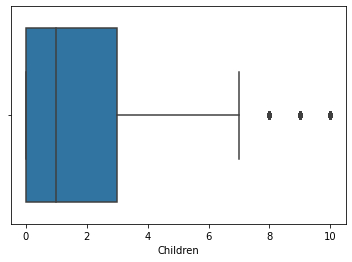

In [10]:
c =sns.boxplot(x='Children', data=df)

In [11]:
df['Children'] = np.where(df['Z_Score_Children'] > 3, df['Children'].median(), df['Children'])
df['Z_Score_Children']=stats.zscore(df['Children'])

In [12]:
df['Z_Score_Age']=stats.zscore(df['Age'])
sum((df.Z_Score_Age < -3) | (df.Z_Score_Age > 3))

0

In [13]:
df['Z_Score_Income']=stats.zscore(df['Income'])
sum((df.Z_Score_Income < -3) | (df.Z_Score_Income > 3))

145

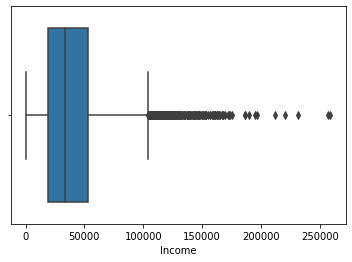

In [14]:
c =sns.boxplot(x='Income', data=df)

In [15]:
df['Income'] = np.where(df['Z_Score_Income'] > 3, df['Income'].median(), df['Income'])
df['Z_Score_Income']=stats.zscore(df['Income'])

In [16]:
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
sum((df.Z_Score_Outage_sec_perweek< -3) | (df.Z_Score_Outage_sec_perweek > 3))

28

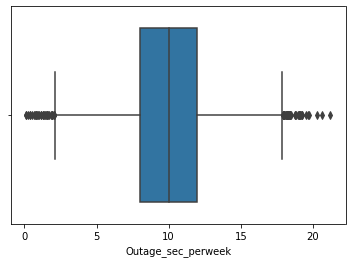

In [17]:
c =sns.boxplot(x='Outage_sec_perweek', data=df)

In [18]:
sum(df.Z_Score_Outage_sec_perweek > 3)

15

In [19]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] > 3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [20]:
sum(df.Z_Score_Outage_sec_perweek < -3)

13

In [21]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] < -3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [22]:
df['Z_Score_Email']=stats.zscore(df['Email'])
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

12

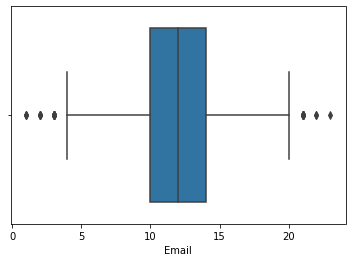

In [23]:
c =sns.boxplot(x='Email', data=df)

In [24]:
sum(df.Z_Score_Email < -3)

9

In [25]:
df['Email'] = np.where(df['Z_Score_Email'] < -3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [26]:
sum(df.Z_Score_Email > 3)

3

In [27]:
df['Email'] = np.where(df['Z_Score_Email'] > 3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [28]:
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])
sum(df.Z_Score_Contacts > 3)

165

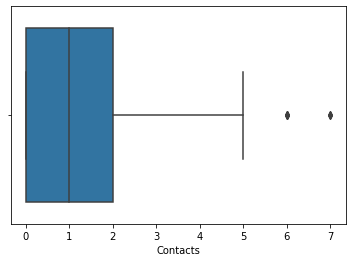

In [29]:
c =sns.boxplot(x='Contacts', data=df)

In [30]:
df['Contacts'] = np.where(df['Z_Score_Contacts'] > 3, df['Contacts'].median(), df['Contacts'])
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])

In [31]:
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])
sum((df.Z_Score_Yearly_equip_failure < -3) | (df.Z_Score_Yearly_equip_failure > 3))

94

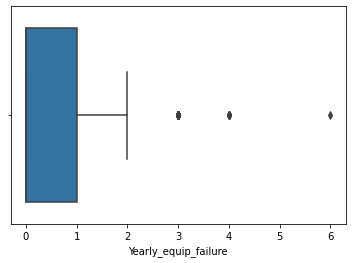

In [32]:
c =sns.boxplot(x='Yearly_equip_failure', data=df)

In [33]:
df['Yearly_equip_failure'] = np.where(df['Z_Score_Yearly_equip_failure'] > 3, df['Yearly_equip_failure'].median(), df['Yearly_equip_failure'])
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])

In [34]:
df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
sum((df.Z_Score_Tenure < -3) | (df.Z_Score_Tenure > 3))

0

In [35]:
df['Z_Score_Monthly_Charge']=stats.zscore(df['MonthlyCharge'])
sum((df.Z_Score_Monthly_Charge < -3) | (df.Z_Score_Monthly_Charge> 3))

0

In [36]:
df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
sum((df.Z_Score_Bandwidth_GB_Year< -3) | (df.Z_Score_Bandwidth_GB_Year> 3))

0

In [37]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [38]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [39]:
df.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,...,Z_Score_Children,Z_Score_Age,Z_Score_Income,Z_Score_Outage_sec_perweek,Z_Score_Email,Z_Score_Contacts,Z_Score_Yearly_equip_failure,Z_Score_Tenure,Z_Score_Monthly_Charge,Z_Score_Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9756.562400,1.925000,53.078400,38151.157582,0.265000,9.999841,12.022200,0.940800,0.368800,34.526188,...,-1.634248e-17,-9.556800e-17,1.499245e-16,2.648548e-16,5.542233e-17,6.288303e-17,-5.258016e-17,2.273737e-17,-2.529532e-16,9.094947e-17
std,14432.698671,1.883383,20.698882,24850.801431,0.441355,2.933317,3.004565,0.891614,0.578464,26.443063,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,0.000000,0.000000,18.000000,348.670000,0.000000,1.144796,3.000000,0.000000,0.000000,1.000259,...,-1.022148e+00,-1.694785e+00,-1.521254e+00,-3.018934e+00,-3.002981e+00,-1.055218e+00,-6.375829e-01,-1.267917e+00,-2.157520e+00,-1.481263e+00
25%,738.000000,0.000000,35.000000,19224.717500,0.000000,8.033911,10.000000,0.000000,0.000000,7.917694,...,-1.022148e+00,-8.734435e-01,-7.616409e-01,-6.702407e-01,-6.730762e-01,-1.055218e+00,-6.375829e-01,-1.006306e+00,-7.602435e-01,-9.865847e-01
50%,2910.500000,1.000000,53.000000,33169.742500,0.000000,10.018270,12.000000,1.000000,0.000000,35.430507,...,-4.911622e-01,-3.787834e-03,-2.004629e-01,6.282993e-03,-7.389127e-03,6.639979e-02,-6.375829e-01,3.420043e-02,-1.197020e-01,-5.162246e-02
75%,13168.000000,3.000000,71.000000,51669.637500,1.000000,11.955480,14.000000,1.000000,1.000000,61.479795,...,5.708101e-01,8.658679e-01,5.440129e-01,6.667323e-01,6.582980e-01,6.639979e-02,1.091221e+00,1.019358e+00,6.546178e-01,1.003942e+00
max,111850.000000,8.000000,89.000000,124025.100000,1.000000,18.851730,21.000000,3.000000,2.000000,71.999280,...,3.225741e+00,1.735524e+00,3.455753e+00,3.017858e+00,2.988203e+00,2.309636e+00,2.820025e+00,1.417195e+00,2.737145e+00,1.723716e+00


In [40]:
df.to_csv(r'C:\Users\paowm\Desktop\churn_clean.csv')

C4. Visualizations

Univariate visualizations

Continuous variables

<AxesSubplot:xlabel='Children'>

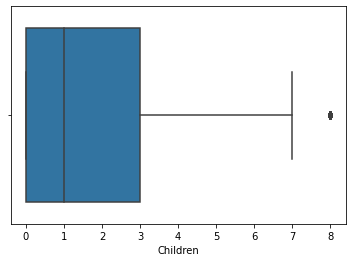

In [41]:
sns.boxplot(x=df["Children"])

<AxesSubplot:xlabel='Age'>

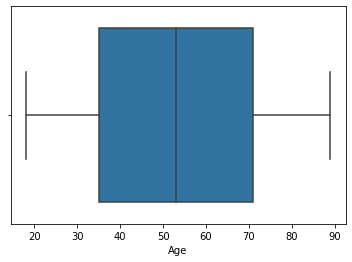

In [42]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Income'>

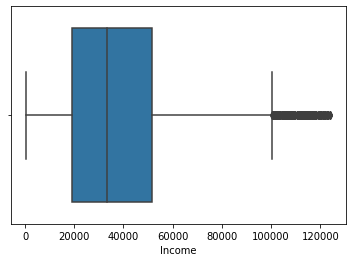

In [43]:
sns.boxplot(x=df["Income"])

<AxesSubplot:xlabel='Outage_sec_perweek'>

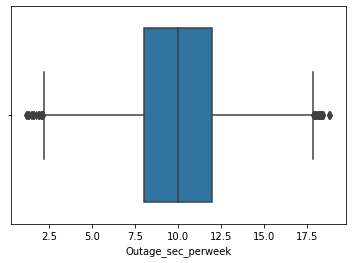

In [44]:
sns.boxplot(x=df["Outage_sec_perweek"])

<AxesSubplot:xlabel='Email'>

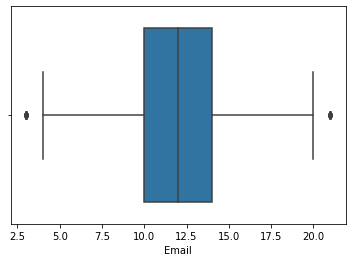

In [45]:
sns.boxplot(x=df["Email"])

<AxesSubplot:xlabel='Contacts'>

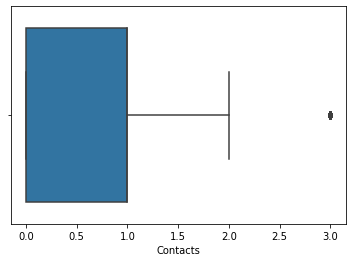

In [46]:
sns.boxplot(x=df["Contacts"])

<AxesSubplot:xlabel='Yearly_equip_failure'>

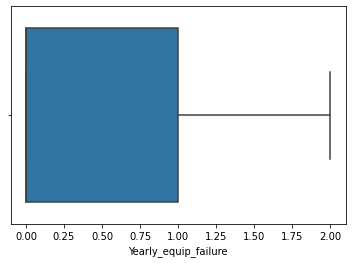

In [47]:
sns.boxplot(x=df["Yearly_equip_failure"])

<AxesSubplot:xlabel='Tenure'>

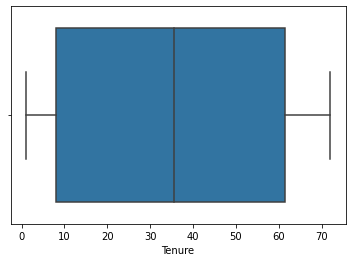

In [48]:
sns.boxplot(x=df["Tenure"])

<AxesSubplot:xlabel='MonthlyCharge'>

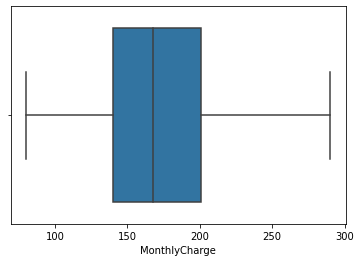

In [49]:
sns.boxplot(x=df["MonthlyCharge"])

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

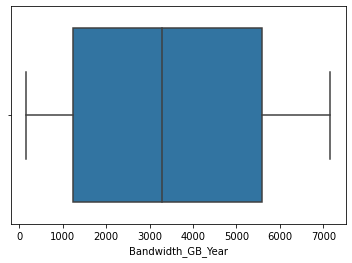

In [50]:
sns.boxplot(x=df["Bandwidth_GB_Year"])

### Categorical variables

<AxesSubplot:xlabel='Marital', ylabel='Count'>

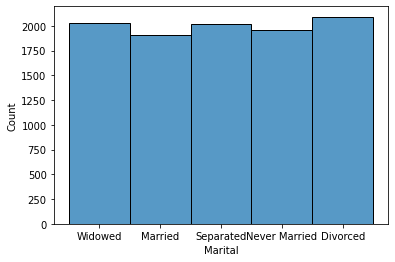

In [51]:
sns.histplot(data=df, x="Marital")

<AxesSubplot:xlabel='Gender', ylabel='Count'>

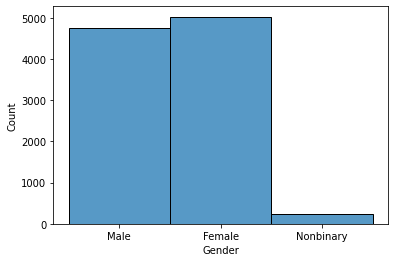

In [52]:
sns.histplot(data=df, x="Gender")

<AxesSubplot:xlabel='Techie', ylabel='Count'>

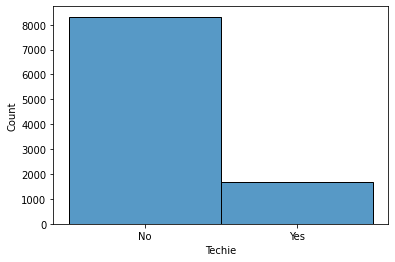

In [53]:
sns.histplot(data=df, x="Techie")

<AxesSubplot:xlabel='Contract', ylabel='Count'>

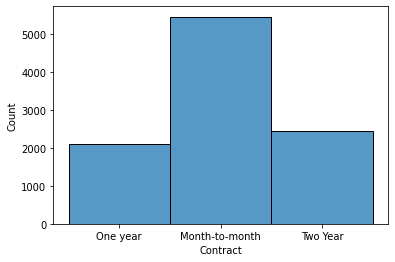

In [54]:
sns.histplot(data=df, x="Contract")

<AxesSubplot:xlabel='Port_modem', ylabel='Count'>

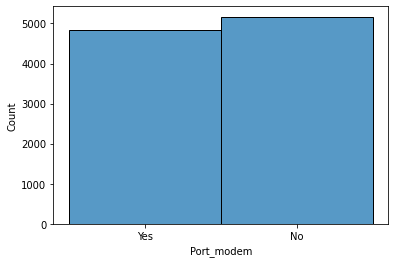

In [55]:
sns.histplot(data=df, x="Port_modem")

<AxesSubplot:xlabel='Tablet', ylabel='Count'>

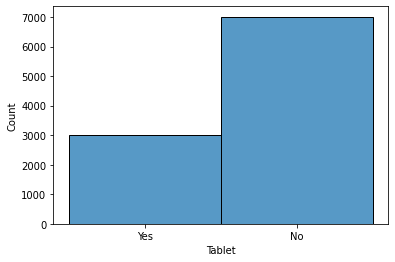

In [56]:
sns.histplot(data=df, x="Tablet")

<AxesSubplot:xlabel='Phone', ylabel='Count'>

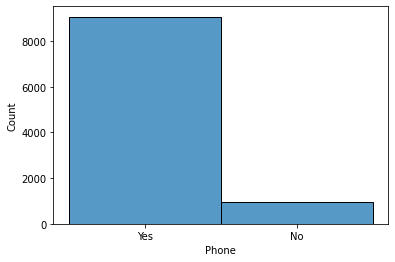

In [57]:
sns.histplot(data=df, x="Phone")

<AxesSubplot:xlabel='Multiple', ylabel='Count'>

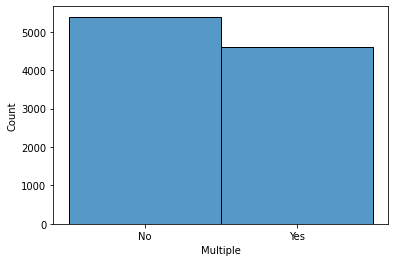

In [58]:
sns.histplot(data=df, x="Multiple")

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

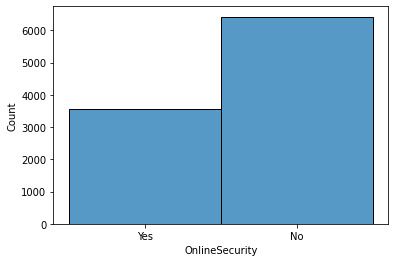

In [59]:
sns.histplot(data=df, x="OnlineSecurity")

<AxesSubplot:xlabel='OnlineBackup', ylabel='Count'>

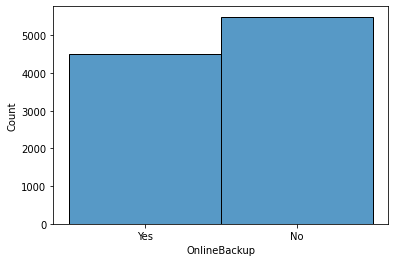

In [60]:
sns.histplot(data=df, x="OnlineBackup")

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

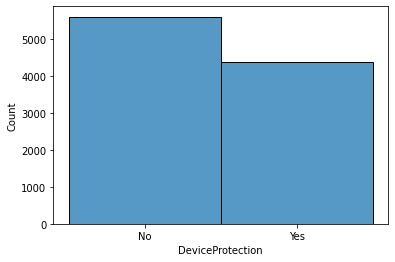

In [61]:
sns.histplot(data=df, x="DeviceProtection")

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

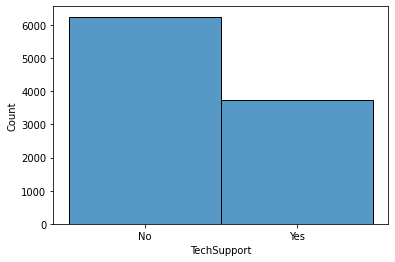

In [62]:
sns.histplot(data=df, x="TechSupport")

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

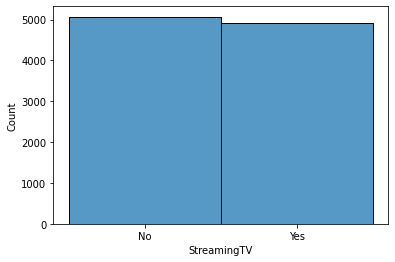

In [63]:
sns.histplot(data=df, x="StreamingTV")

<AxesSubplot:xlabel='StreamingMovies', ylabel='Count'>

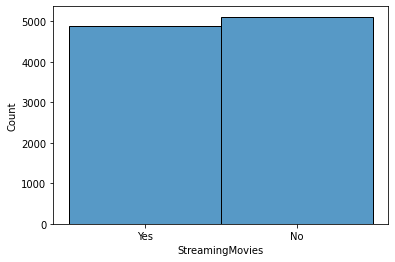

In [64]:
sns.histplot(data=df, x="StreamingMovies")

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Count'>

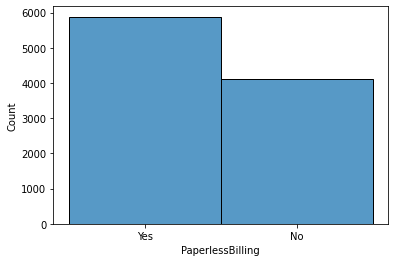

In [65]:
sns.histplot(data=df, x="PaperlessBilling")

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

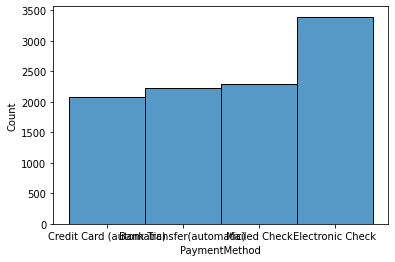

In [66]:
sns.histplot(data=df, x="PaymentMethod")

Bivariate visualizations

Numerical variables

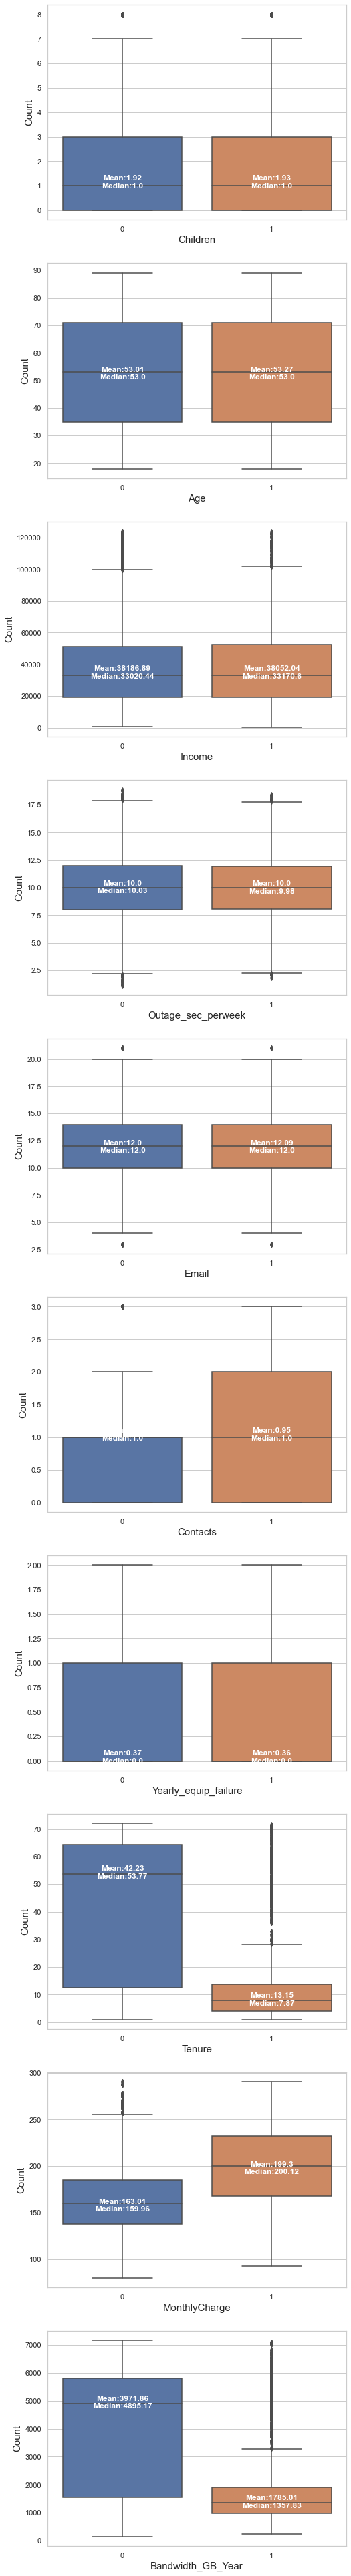

In [67]:
plot = ['Children', 'Age', 'Income','Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year']

sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=1, nrows = len(plot), figsize = (8,7*len(plot)))
i = 0
for x in plot:
    g = sns.boxplot(x='Churn',y=x,data=df, ax=axes[i])
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Count",fontsize=15)
    i += 1
    means = df.groupby('Churn')[x].mean()
    medians = df.groupby('Churn')[x].median()
    vertical_offset = df[x].mean() *.05
    for xtick in g.get_xticks():
        g.text(xtick,medians[xtick]-vertical_offset,"Mean:"+str(round(means[xtick],2))+'\n'+"Median:"+str(round(medians[xtick],2)), horizontalalignment='center', color='w', weight='semibold')


plt.show(fig)

Categorical variables

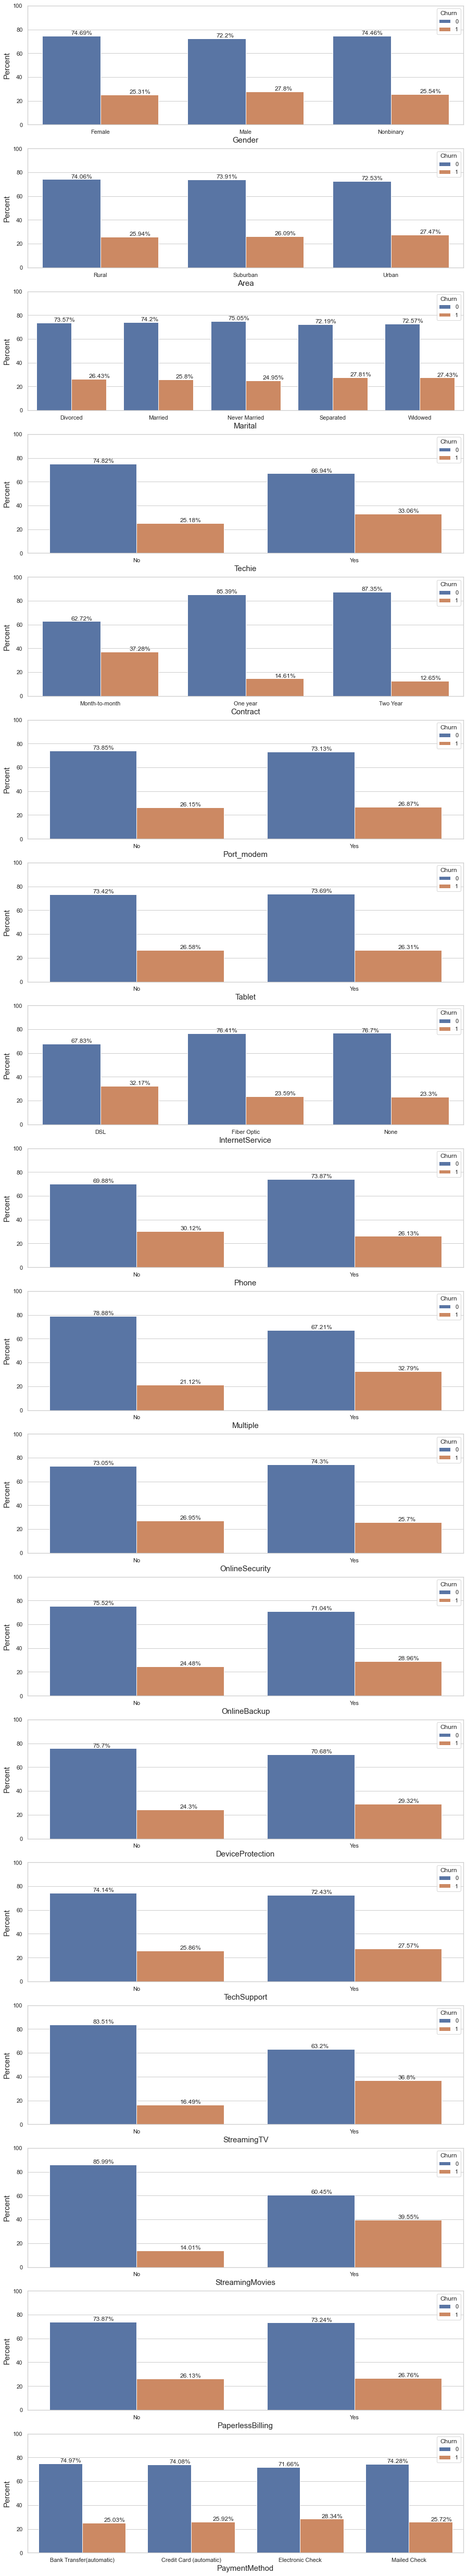

In [68]:
plot = ['Gender', 'Area','Marital','Techie','Contract','Port_modem',
           'Tablet','InternetService','Phone','Multiple','OnlineSecurity','OnlineBackup',
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'PaperlessBilling','PaymentMethod']

sns.set(style="whitegrid", color_codes=True)
fig, axes = plt.subplots(ncols=1, nrows = len(plot), figsize = (15,5*len(plot)))
i = 0
for x in plot:
    d = df.groupby(x)['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    g = sns.barplot(x=x,y='Percentage',hue='Churn', data=d, ax=axes[i])     # Create bar chart
    g.set_ylim(0,100)
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Percent",fontsize=15)
    i += 1
    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height()
        g.text(txt_x,txt_y+1,txt)        # Printing percentages on the bars


plt.show(fig)

Convert categorical variables to dummy variables

In [69]:
df = df.drop(columns=['Z_Score_Children','Z_Score_Age','Z_Score_Income','Z_Score_Outage_sec_perweek','Z_Score_Email', 'Z_Score_Contacts', 'Z_Score_Yearly_equip_failure', 'Z_Score_Tenure','Z_Score_Monthly_Charge', 'Z_Score_Monthly_Charge','Z_Score_Bandwidth_GB_Year'])

In [70]:
df.dtypes

Population                int64
State                    object
Area                     object
Children                float64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                     int64
Outage_sec_perweek      float64
Email                   float64
Contacts                float64
Yearly_equip_failure    float64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: o

C5. Prepared datast

A copy of the prepared dataset has been provided in the submission.

D1. Initial model

In [71]:
dummy_variables = ['State','Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']

index = 0

In [72]:
def get_dummies(dummy_variables, df2):
    global index
    dummy_data = pd.get_dummies(df2, prefix=dummy_variables, columns=dummy_variables, drop_first= True)
    y = dummy_data['Churn_1']
    dummy_data.drop(columns=['Churn_1'], inplace=True)
    sc = StandardScaler()
    dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:,to_transform])
    index += 1
    return y, dummy_data

y, dummy_data = get_dummies(dummy_variables, df)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

In [74]:
def get_model(y_train,X_train, X_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    logit_model=sm.Logit(y_train,X_train)
    model=logit_model.fit()
    print(model.summary())
    y_hat = list(map(round, model.predict(X_test)))
    arr = np.c_[y_hat, y_test]
    print('\nPredicted and actual values:\n',arr)
    print('Confusion Matrix \n',confusion_matrix(y_test, y_hat))
    print('Accuracy Score: ',accuracy_score(y_test, y_hat))
    return model, arr

In [75]:
def get_sk_model(y_train,X_train, X_test):
    model = LogisticRegression(max_iter=100000000)
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_[0]]
    intercept = model.intercept_[0]
    print('\nModel coefficients and intercept Sklearn:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPredicted and actual values:\n',np.c_[y_pred, y_test])
    print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()
    print('Accuracy Scores\n',accuracy_score(y_test, y_pred))
    print('Classification Report:\n',classification_report(y_test, y_pred))
    return model, arr, intercept

In [76]:
def roc(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))

c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Churn_1   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6910
Method:                           MLE   Df Model:                           89
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                     inf
Time:                        21:36:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2566      0.778

C:\Users\paowm\AppData\Local\Temp/ipykernel_13060/358528510.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\paowm\AppData\Local\Temp/ipykernel_13060/358528510.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


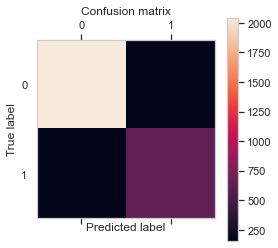

Accuracy Scores
 0.8923333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      2201
           1       0.80      0.79      0.80       799

    accuracy                           0.89      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.89      0.89      0.89      3000



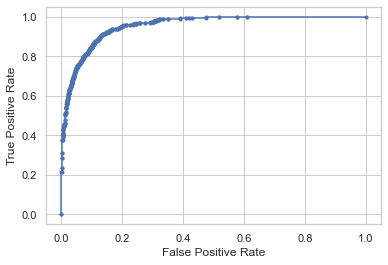

AUC: 0.955


In [77]:
get_model(y_train,X_train, X_test)

model, arr, intercept = get_sk_model(y_train,X_train, X_test)
# Run AUC
roc(model, X_test, y_test)

D2. Justification of model reduction

We will use the p-values to determine which variables to be included in the reduced model. Variables with a p-value of less than 0.05 is considered statistically significant to the response variable. This will ensure we are only using those variables that have an impact on customers churning, which is our research question stated in A1.

With a p-value of less than 0.05 we are rejecting the null hypothesis that there is no correlation between the dependent variable and the independent variable. We can imply that the model fits the data well (Abhigyan, 2020).

The evaluation metric to be used is the accuracy classification score metric. If this metric is close to 1 then we can infer the model is good at predicting churn. 

To compare the models, we are also using the AUC-ROC curve. ROC is a probability curve and AUC measures the separability between the distributions of true positive and true negative values (Narkhede,2018). 

D3. Reduced logistic regression model

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Churn_1   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6993
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                     inf
Time:                        21:36:11   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5344      0.089    -17.322      0.000      -1.708      -1.361
Monthly

c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\paowm\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\paowm\AppData\Local\Temp/ipykernel_13060/358528510.py:12: MatplotlibDeprecati


Predicted and actual values:
 [[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [1 0]
 [0 0]]
Confusion Matrix
 [[2041  160]
 [ 518  281]]


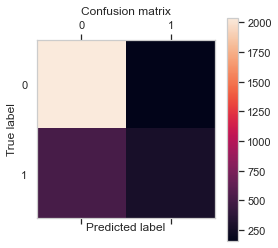

Accuracy Scores
 0.774
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2201
           1       0.64      0.35      0.45       799

    accuracy                           0.77      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.75      0.77      0.75      3000



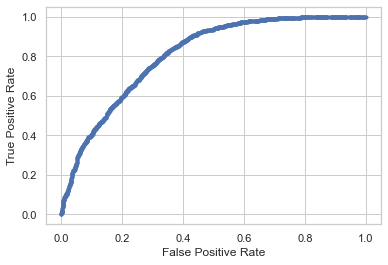

AUC: 0.809


In [78]:
data_reduced = df[['MonthlyCharge', 'Techie', 'Contract', 'StreamingTV', 'StreamingMovies','Churn']]

dummy_variables = ['Churn', 'Techie','Contract',
            'StreamingTV', 'StreamingMovies']

to_transform = ['MonthlyCharge']

data_diff = [i for i in df.columns.tolist() + data_reduced.columns.tolist() if i not in df.columns.tolist() or i not in data_reduced.columns.tolist()]

y, dummy_data_reduced = get_dummies(dummy_variables, data_reduced)
X_train, X_test, y_train, y_test = train_test_split(dummy_data_reduced,y,test_size=.3, random_state=0)
get_model(y_train,X_train, X_test)
model, arr, intercept = get_sk_model(y_train,X_train, X_test)
roc(model, X_test, y_test)

E1. Model comparison

For the initial regression model we dropped those variables that are not relevant to the study, e.g., 'CaseOrder', 'Customer_id', etc. We decided to include 20 numerical and 11 categorical variables, so we have a well founded analysis. 

After reducing the model using the p-value method, we are including only 1 numerical and 4 categorical variables relevant to this study. The variables used in this second model are 'MonthlyCharge', 'Techie', 'Contract', 'StreamingTV', 'StreamingMovies'.

The accuracy classification score for the reduced model is lower than the initial model, 0.77 as opposed to 0.89. Even though the intial model score is higher, the reduced model is more reliable since it only includes those variables that are statistically significant to our study.

The ROC curve shows there is an overlap between the distributions of true positive and true negative values and we can infer that there is the presence of both false positives and false negatives in our predictions. The AUCs of the reduced model is lower than the initial model, 0.809 vs 0.955. Despite this, we still have a good reduced model in terms of separability.

As for the confusion matrices, the initial model has 2044 true negatives as opposed to the reduced model that has 2037. In the case of true positives, the intial model has 286 vs the 633 of the reduced model. This means the model is good at predicting outcomes. However, like we mentioned before the reduced model has more reliability.


E2. Output and calculations

The calculations and output are all included in this Jupyter Notebook.

E3. Code

The code has been provided in this Jupyter Notebook.

F1. Results



•  the statistical and practical significance of the model

•  the limitations of the data analysis

A regression equation for the reduced model

The response variable is described as P (Y=1|X), i.e., the probability of a customer churning. The predictor variables are those variables included in the reduced model in section E1. 

The corresponding regression equation of the reduced model is shown below:

P (Y=1|X) = 1 / (1 + exp(-1x(0.60 x MonthlyCharge + 0.55 x Techie_Yes - 1.62 x Contract_One year - 1.80 x Contract_Two Year + 0.73 x StreamingTV_Yes + 0.91 x StreamingMovies_Yes -1.52)))

Interpretation of coefficients of the statistically significant variables of the model

The logistic regression coefficients are the expected change in log odds of churning per unit change in a predictor variable (Choueiry).

In the case of MonthlyCharge, the coefficient is β = 0.60 which indicates that MonthlyCharge is associated with a 82%(e^β-1 or e^-0.6-1) increase in Churn. In other words, if MonthlyCharge increases one unit there is an increase of 82% in the odds of churning.

On the other hand, Contract_One Year has a coefficient of -1.62. An increase of one year to two years in the contract will represent a 80%(1-e^β or 1-e^-1.61) decrease in the odds of churning.

Depending on whether the predictor variables are negative or positive, we would see the same impact over the response variable mentioned before.

Limitations of the data analysis

One of the limitations of our logistic regression model is that we can only use it to predict a discrete outcome in this case Churn. If we wanted to predict a continuous variable, we will have to use a linear regression.

Another limitation is the number of observations since it is already determined. If we wanted to ensure our model is not overfitting we would need to get more observations. The bigger the sample size, the more reliable the model will be.

We can also mention that the accuracy of the reduced model is not as expected. One possible explanation is that this classification model is not the most suitable for this study. We can try different classification models to see which one fits our dataset best.

F2. Recommendations

After the logistic regression analysis, we can recommend that the company stop investing in those services that are making the customers churn, i.e., streaming tv, streaming movies and electronic check payment method. These services might be under performing and the influencing negatively in their perception of the company. 

Besides, the company should push for customers to get a contract for one year or two years since these are making customers more likely to stay.

G. Panopto video

H. Sources of third-party code

Packet, C. J. (2022, June 29). Github. Retrieved from Practical-Data-Science-using-Python: https://github.com/PacktPublishing/Practical-Data-Science-using-Python/blob/main/telecom-churn-prediction-logistic-regression.ipynb

Sharma, A. (2021, May 2). Github. Retrieved from Customer Churn Analysis: https://github.com/microbhai/CustomerChurnAnalysis/blob/master/LogisticRegression/.ipynb_checkpoints/LogisticRegression-checkpoint.ipynb


I. Sources

Cole, A. (2020, May 13). Predicting Customer Churn Using Logistic Regression. Retrieved from Towards Data Science: https://towardsdatascience.com/predicting-customer-churn-using-logistic-regression-c6076f37eaca

Editor, B. (2013, July 01). How to Interpret Regression Analysis Results: P-values and Coefficients. Retrieved from Minitab: https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients#:~:text=How%20Do%20I%20Interpret%20the,can%20reject%20the%20null%20hypothesis.

Frost, J. (n.d.). How to Interpret P-values and Coefficients in Regression Analysis. Retrieved from Statistics by Jim: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

Narkhede, S. (2018, June 26). Understanding AUC - ROC Curve. Retrieved from Towards Data Science: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Zach. (2020, October 13). Retrieved from Statology: https://www.statology.org/assumptions-of-logistic-regression/